##### GIS Data Analysis Notebook

This notebook connects to a PostgreSQL database containing GIS data and performs analysis on water mains infrastructure data.

##### Setup
The notebook uses:
- pandas for data manipulation and analysis
- psycopg2 for PostgreSQL database connection
- RealDictCursor to return results as dictionaries

##### Database Connection
Connection parameters are configured to connect to a local PostgreSQL database running in Docker.


In [11]:
import pandas as pd
import psycopg2
from psycopg2.extras import RealDictCursor

# Option 1: Set display options for all future outputs
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Width of the display in characters
pd.set_option('display.max_colwidth', None) # Don't truncate column conten

In [12]:
# Database connection parameters (based on docker-compose.yml configuration)
db_params = {
    "dbname": "gis_data",
    "user": "gis_user",
    "password": "password",
    "host": "localhost",  # Use localhost since we're connecting from outside the container
    "port": "5432"       # The exposed port in docker-compose.yml
}

In [13]:
# Create a connection
conn = psycopg2.connect(**db_params)
# Create a cursor that returns results as dictionaries
cur = conn.cursor(cursor_factory=RealDictCursor)
# Test the connection with a simple query
cur.execute('SELECT version();')
version = cur.fetchone()
print(version)

# Don't forget to close the connection when you're done
cur.close()
conn.close()

RealDictRow([('version', 'PostgreSQL 15.4 (Debian 15.4-1.pgdg110+1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 10.2.1-6) 10.2.1 20210110, 64-bit')])


In [14]:
# Reestablish database connection
conn = psycopg2.connect(**db_params)
cur = conn.cursor(cursor_factory=RealDictCursor)

# First get the tables
cur.execute("""
    SELECT table_name 
    FROM information_schema.tables 
    WHERE table_schema = 'public'
    ORDER BY table_name;
""")
tables = cur.fetchall()

# Now query column information for each table
for table in tables:
    table_name = table['table_name']
    print(f"Table: {table_name}")
    
cur.close()
conn.close()

Table: geography_columns
Table: geometry_columns
Table: spatial_ref_sys
Table: water_mains


In [15]:
# Reestablish database connection
conn = psycopg2.connect(**db_params)

# Read the watermains table directly into a pandas DataFrame
watermains_df = pd.read_sql_query("""
    SELECT *
    FROM water_mains
""", conn)

# Close the connection
conn.close()

# Display basic information about the DataFrame
print("DataFrame Shape:", watermains_df.shape)
print("\nColumns:", watermains_df.columns.tolist())
print("\nFirst few rows:")
watermains_df.head()

/var/folders/q1/p80vvjtj4sggxykh_4mhfgt00000gn/T/ipykernel_3904/2391406011.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  watermains_df = pd.read_sql_query("""


DataFrame Shape: (16061, 33)

Columns: ['id', 'city', 'dataset_type', 'object_id', 'watmain_id', 'status', 'pressure_zone', 'roadsegment_id', 'map_label', 'category', 'pipe_size', 'material', 'lined', 'lined_date', 'lined_material', 'installation_date', 'acquisition', 'consultant', 'ownership', 'bridge_main', 'bridge_details', 'criticality', 'rel_cleaning_area', 'rel_cleaning_subarea', 'undersized', 'shallow_main', 'condition_score', 'oversized', 'cleaned', 'shape_length', 'geometry', 'created_at', 'updated_at']

First few rows:


,id,city,dataset_type,object_id,watmain_id,status,pressure_zone,roadsegment_id,map_label,category,pipe_size,material,lined,lined_date,lined_material,installation_date,acquisition,consultant,ownership,bridge_main,bridge_details,criticality,rel_cleaning_area,rel_cleaning_subarea,undersized,shallow_main,condition_score,oversized,cleaned,shape_length,geometry,created_at,updated_at
0,1,Kitchener,WaterMains,77753,10080,ACTIVE,KIT 6,5457,34.2m 450mm DI,TREATED,450.0,DI,NO,NaT,NONE,1979-01-01,DONATED,None,DUAL CITY AND REGION,N,None,6,6,8,N,N,8.50,N,N,34.210563,0102000020E6100000040000002F526E01952254C02774E05E77B5454088D87E3B952254C09CF4B2DC76B545405B4D44C7962254C019A0256573B54540CD3385C7982254C042E76CE86EB54540,2024-12-24 20:15:07.421622,2024-12-24 20:15:07.421622
1,2,Kitchener,WaterMains,77754,76299,ACTIVE,KIT 4,6390,.4m 300mm DI,TREATED,300.0,DI,NO,NaT,NONE,1968-07-01,PURCHASED,None,REGION,N,None,7,1,4,N,N,8.50,N,N,0.355118,0102000020E61000000200000054239539302054C02A036E4535B6454088C70631302054C09FD0AE2D35B64540,2024-12-24 20:15:07.421622,2024-12-24 20:15:07.421622
2,3,Kitchener,WaterMains,77755,10110,ACTIVE,KIT 6,5393,67.9m 450mm DI,TREATED,450.0,DI,NO,NaT,NONE,1979-01-01,DONATED,None,DUAL CITY AND REGION,N,None,7,6,8,N,N,6.10,N,Y,67.852910,0102000020E61000000B000000268A98C0802254C01ED5ECF1A4B54540B62DFF30812254C0C79FD3F3A3B54540C6E4C87C822254C00AC8C805A1B54540AB1A7DA0822254C0049F11B5A0B5454092A41CC8832254C02ED9C3189EB54540B4F5FA4D842254C0CF6E22EA9CB5454053EE7039852254C04DF9D9D59AB54540A437C6AE852254C0A43595CC99B545403AF4C8BB862254C0F44E6E6C97B5454023CF7D49872254C0272F112C96B54540A470DB31882254C0DE22B51E94B54540,2024-12-24 20:15:07.421622,2024-12-24 20:15:07.421622
3,4,Kitchener,WaterMains,77756,82566,ACTIVE,KIT 6,5393,7m 450mm DI,TREATED,450.0,DI,NO,NaT,NONE,1979-01-01,DONATED,None,DUAL CITY AND REGION,N,None,6,6,8,N,N,4.58,N,Y,7.039328,0102000020E610000003000000A470DB31882254C0DE22B51E94B5454029B209B8882254C0A8905AEF92B54540E1AA85F7882254C0B3AFDD5F92B54540,2024-12-24 20:15:07.421622,2024-12-24 20:15:07.421622
4,5,Kitchener,WaterMains,77757,82568,ACTIVE,KIT 6,5394,15m 450mm DI,TREATED,450.0,DI,NO,NaT,NONE,1979-01-01,DONATED,None,DUAL CITY AND REGION,N,None,6,6,8,N,N,8.50,N,Y,14.956131,0102000020E610000002000000FD722C1B8F2254C06BF6DF9984B545409CFC7EC1902254C05D36B7E680B54540,2024-12-24 20:15:07.421622,2024-12-24 20:15:07.421622



Numerical Columns Summary Statistics:
                 id      object_id     watmain_id  roadsegment_id  \
count  16061.000000   16061.000000   16061.000000    16061.000000   
mean    8031.000000  106462.534276   84822.247058   118419.340639   
std     4636.555672   43703.387973   37948.406063   217904.491977   
min        1.000000   77753.000000     270.000000     1223.000000   
25%     4016.000000   82387.000000   69150.000000     9420.000000   
50%     8031.000000   87079.000000   86470.000000    13297.000000   
75%    12046.000000   91848.000000   95888.000000    40263.000000   
max    16061.000000  257573.000000  153898.000000   608873.000000   

          pipe_size   criticality  condition_score  shape_length  
count  16061.000000  16061.000000     16061.000000  16061.000000  
mean     230.913579      4.500654         8.695535     58.109384  
std      110.715761      3.089564         1.480017     82.369190  
min       25.000000     -1.000000        -1.000000      0.000943  
25% 

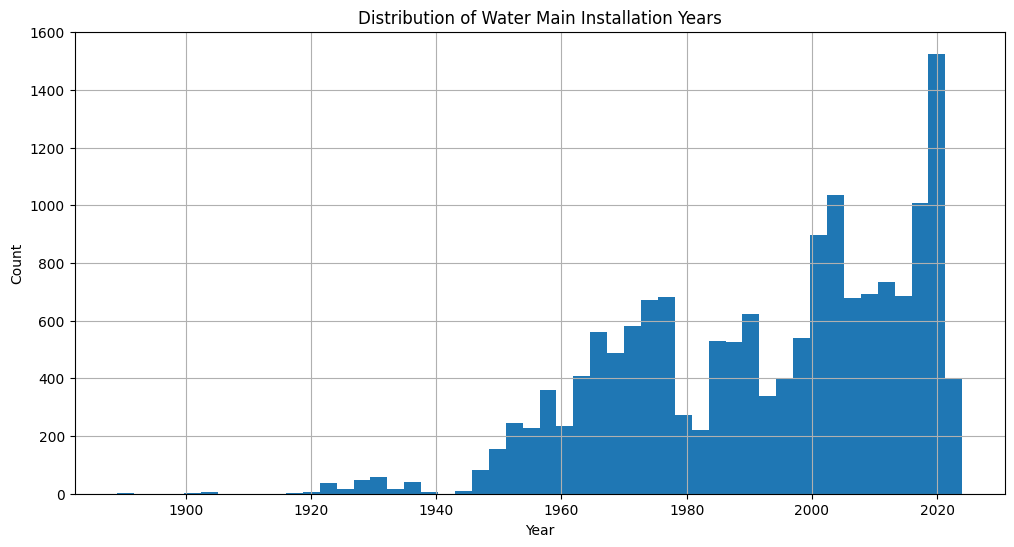


Condition Score Analysis:
count    16061.000000
mean         8.695535
std          1.480017
min         -1.000000
25%          8.500000
50%          9.350000
75%          9.350000
max         10.000000
Name: condition_score, dtype: float64


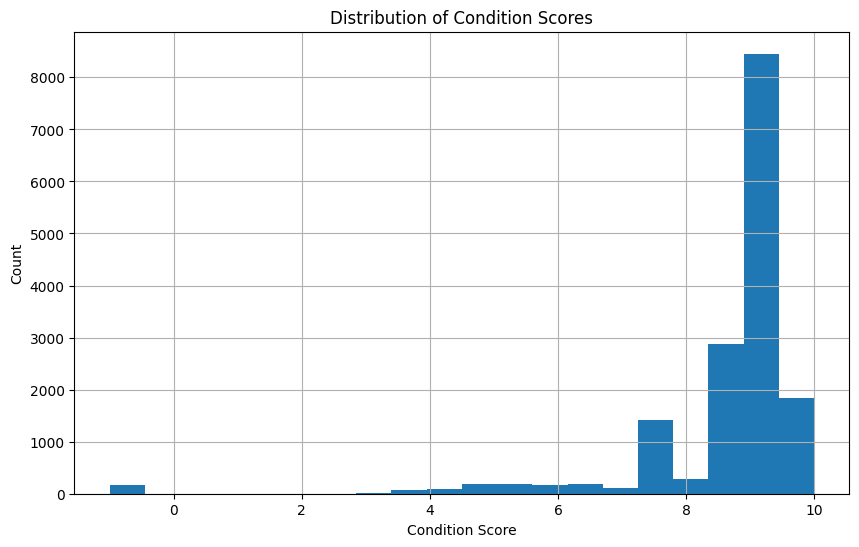


Pipe Size Analysis:
count    16061.000000
mean       230.913579
std        110.715761
min         25.000000
25%        150.000000
50%        200.000000
75%        300.000000
max       1200.000000
Name: pipe_size, dtype: float64


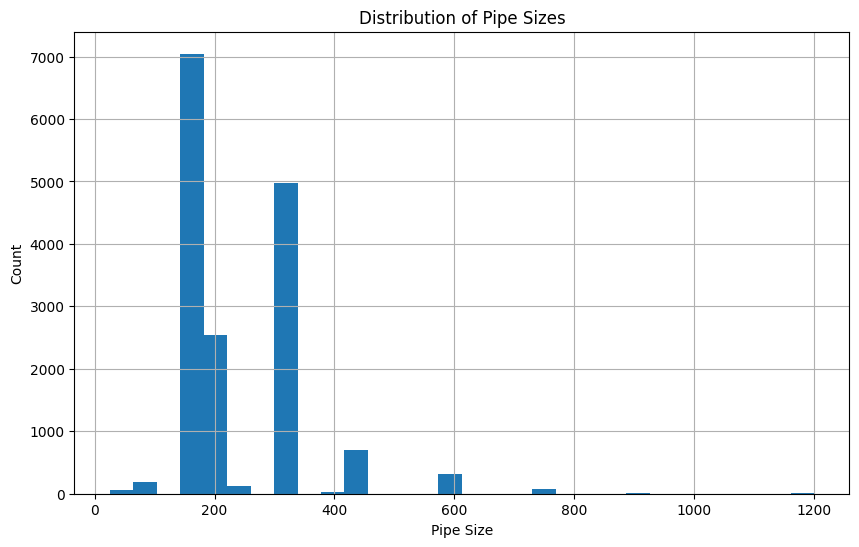


Missing Values Analysis:
                Missing Values  Percentage
lined_date               16006   99.657556
acquisition                 17    0.105846
consultant               11196   69.709234
bridge_details           16053   99.950190


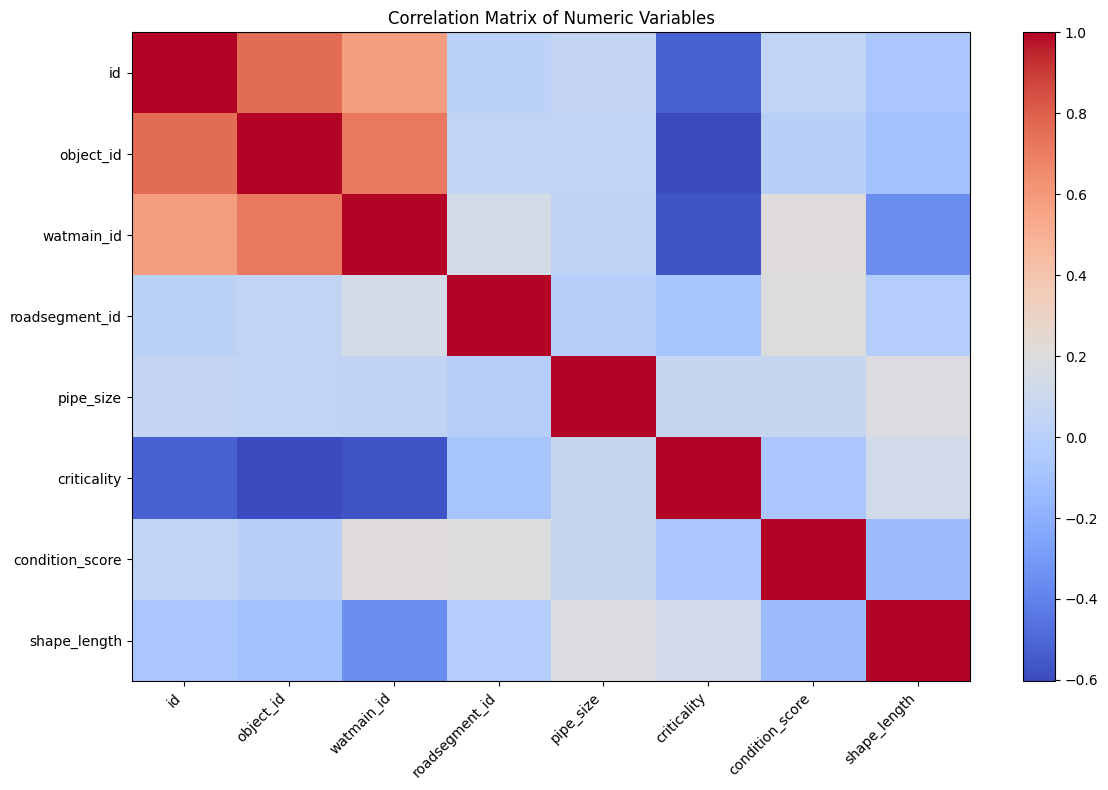

In [17]:
# Perform Exploratory Data Analysis (EDA)

# 1. Basic statistics for numeric columns
print("\nNumerical Columns Summary Statistics:")
numeric_cols = watermains_df.select_dtypes(include=['float64', 'int64']).columns
print(watermains_df[numeric_cols].describe())

# 2. Distribution of categorical variables
print("\nCategorical Columns Value Counts:")
categorical_cols = ['city', 'status', 'pressure_zone', 'category', 'material', 
                   'lined', 'lined_material', 'acquisition', 'ownership']

for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(watermains_df[col].value_counts().head())
    print(f"Unique values: {watermains_df[col].nunique()}")

# 3. Installation date analysis
print("\nInstallation Date Analysis:")
watermains_df['installation_year'] = pd.to_datetime(watermains_df['installation_date']).dt.year
print("\nInstallation Years Summary:")
print(watermains_df['installation_year'].describe())

# Create a histogram of installation years
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
watermains_df['installation_year'].hist(bins=50)
plt.title('Distribution of Water Main Installation Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 4. Condition Analysis
print("\nCondition Score Analysis:")
print(watermains_df['condition_score'].describe())

plt.figure(figsize=(10, 6))
watermains_df['condition_score'].hist(bins=20)
plt.title('Distribution of Condition Scores')
plt.xlabel('Condition Score')
plt.ylabel('Count')
plt.show()

# 5. Pipe Size Analysis
print("\nPipe Size Analysis:")
print(watermains_df['pipe_size'].describe())

plt.figure(figsize=(10, 6))
watermains_df['pipe_size'].hist(bins=30)
plt.title('Distribution of Pipe Sizes')
plt.xlabel('Pipe Size')
plt.ylabel('Count')
plt.show()

# 6. Missing Values Analysis
print("\nMissing Values Analysis:")
missing_values = watermains_df.isnull().sum()
missing_percentages = (missing_values / len(watermains_df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
print(missing_data[missing_data['Missing Values'] > 0])

# 7. Correlation Analysis for Numeric Columns
plt.figure(figsize=(12, 8))
correlation_matrix = watermains_df[numeric_cols].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()
